<div style="color:blue;background-color:cyan;padding:3%;border-radius:150px150px;font-size:2em;text-align:center">Taxi Fare Prediction</div>

## Problem Statement-To predict the taxi fare on the basis of latitude and longitude

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
matplotlib.rcParams.update({'font.size':15})

In [2]:
plt.style.use('dark_background')

## Loading the dataset and analysing it

In [3]:
df=pd.read_csv("TaxiFare.csv")

In [4]:
df.shape

(50000, 8)

In [5]:
df.head(10).style.set_properties(
    **{
        'background-color':'cyan',
        'color':'blue',
        'border-color':'magenta'
    })

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.100000,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.500000,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.500000,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.000000,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.900000,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [6]:
df.describe(include="all").style.set_properties(
    **{
        'background-color':'cyan',
        'color':'blue',
        'border-color':'magenta'
    })

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,nan,49555,nan,nan,nan,nan,nan
top,26:00.0,nan,2011-09-03 01:30:00 UTC,nan,nan,nan,nan,nan
freq,457,nan,3,nan,nan,nan,nan,nan
mean,nan,11.364171,nan,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,nan,9.685557,nan,10.393860,6.224857,10.407570,6.014737,1.289195
min,nan,-5.000000,nan,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,nan,6.000000,nan,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,nan,8.500000,nan,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,nan,12.500000,nan,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

#### No null values so no replacement required

## Encoding

#### Spliting the date and time into year,month,week,hour,minute and second and adding longitude and latitude difference.

In [9]:
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"], format='%Y-%m-%d %H:%M:%S UTC')

In [10]:
df["Hour"]=df["date_time_of_pickup"].dt.hour
df["Minute"]=df["date_time_of_pickup"].dt.minute
df["Date"]=df["date_time_of_pickup"].dt.day
df["Day"]=df["date_time_of_pickup"].dt.dayofweek
df["Month"]=df["date_time_of_pickup"].dt.month
df["Year"]=df["date_time_of_pickup"].dt.year

In [11]:
df=df.drop(["unique_id","date_time_of_pickup"],axis=1)

In [12]:
df["latitude_difference"]=df["latitude_of_dropoff"]-df["latitude_of_pickup"]
df["longitude_difference"]=df["longitude_of_dropoff"]-df["longitude_of_pickup"]

In [13]:
df.head(10).style.set_properties(
    **{
        'background-color':'cyan',
        'color':'blue',
        'border-color':'magenta'
    })

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Hour,Minute,Date,Day,Month,Year,latitude_difference,longitude_difference
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,17,26,15,0,6,2009,-0.009041,0.002701
1,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,16,52,5,1,1,2010,0.070701,0.036780
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,0,35,18,3,8,2011,-0.010708,-0.008504
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,1,4,30,21,5,4,2012,0.024949,-0.004437
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,1,7,51,9,1,3,2010,0.015754,0.011440
5,12.100000,-74.000964,40.731630,-73.972892,40.758233,1,9,50,6,3,1,2011,0.026603,0.028072
6,7.500000,-73.980002,40.751662,-73.973802,40.764842,1,20,35,20,1,11,2012,0.013180,0.006200
7,16.500000,-73.951300,40.774138,-73.990095,40.751048,1,17,22,4,2,1,2012,-0.023090,-0.038795
8,9.000000,-74.006462,40.726713,-73.993078,40.731628,1,13,10,3,0,12,2012,0.004915,0.013384
9,8.900000,-73.980658,40.733873,-73.991540,40.758138,2,1,11,2,2,9,2009,0.024265,-0.010882


## Data visualisation

<Axes: >

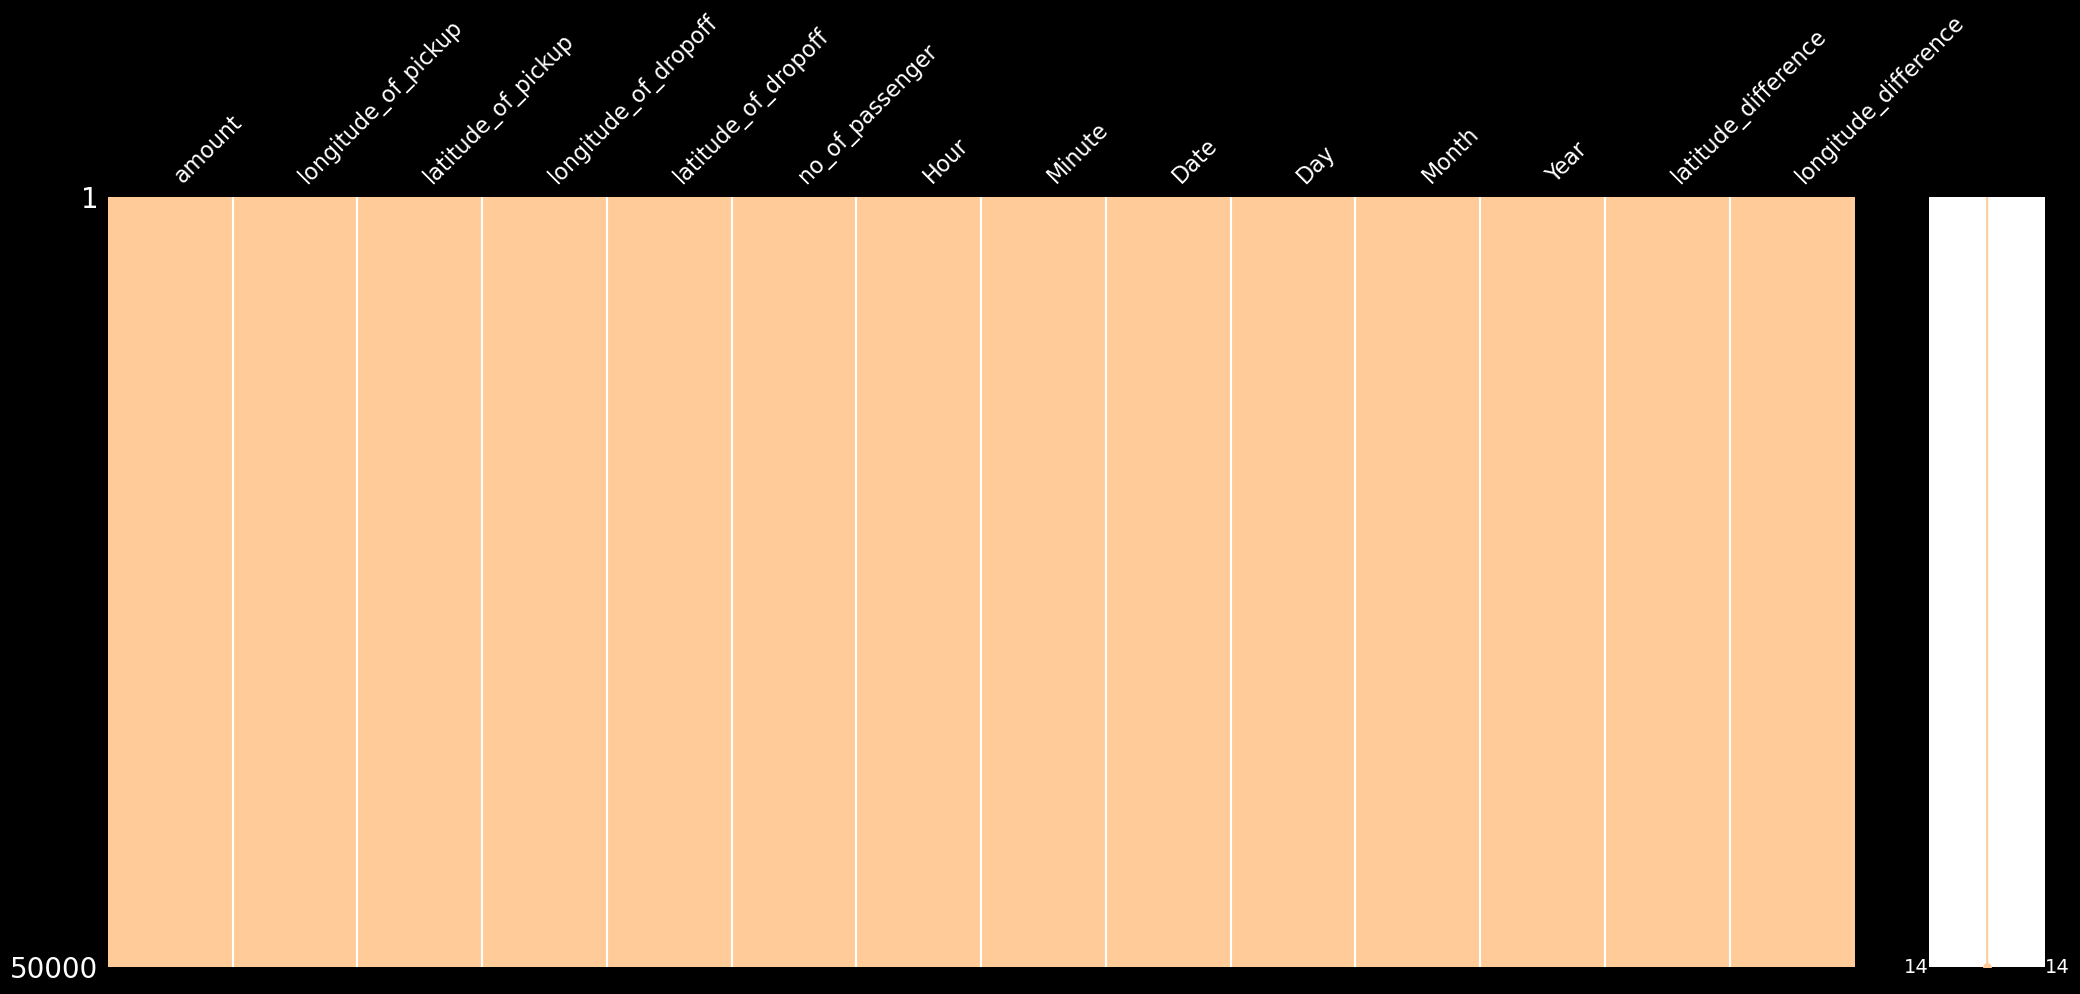

In [14]:
import missingno as msno
msno.matrix(df,color=(1,0.8,0.6))

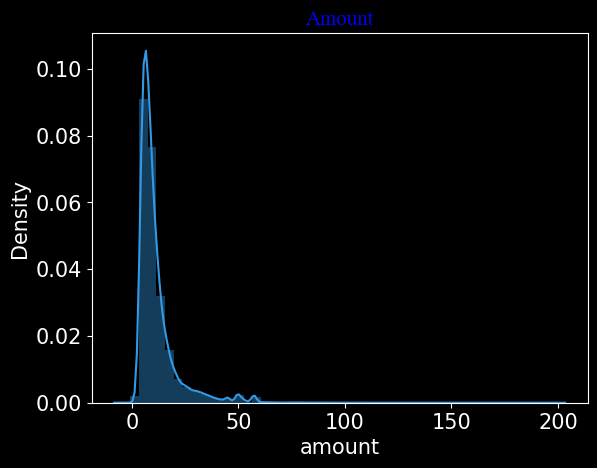

In [15]:
sns.distplot(df["amount"],color=(0.2,0.6,0.9))
plt.title("Amount",color="blue",font="Times New Roman")
plt.show()

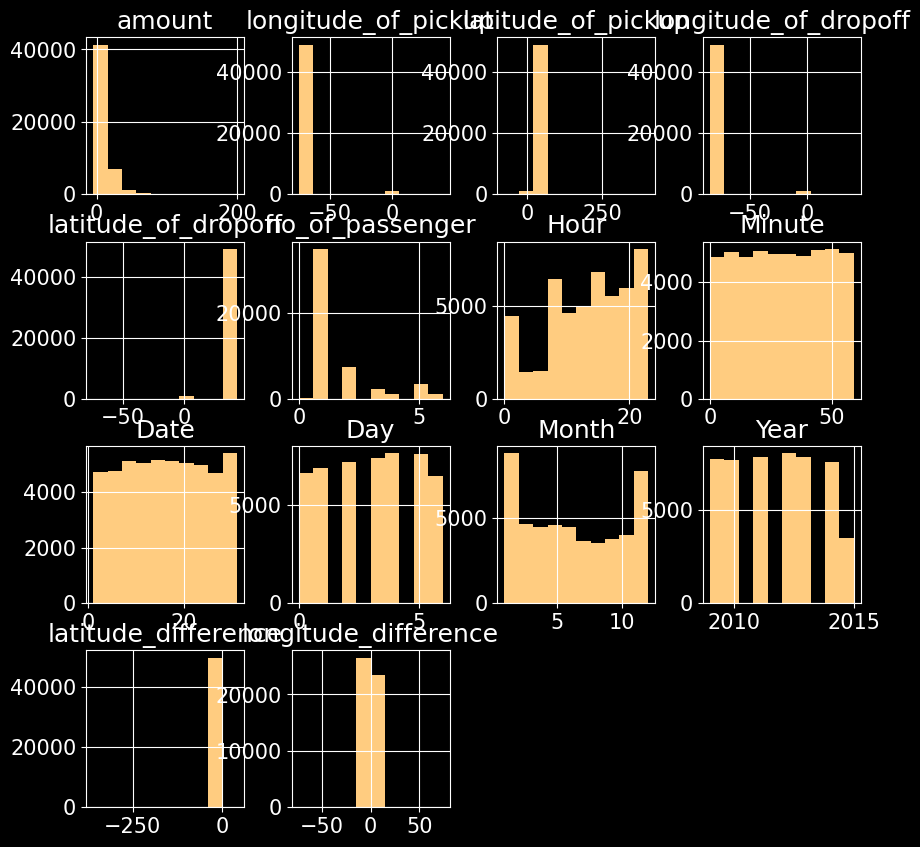

In [16]:
df.hist(figsize=(10,10),color=(1,0.8,0.5))
plt.show()

<Axes: xlabel='amount', ylabel='count'>

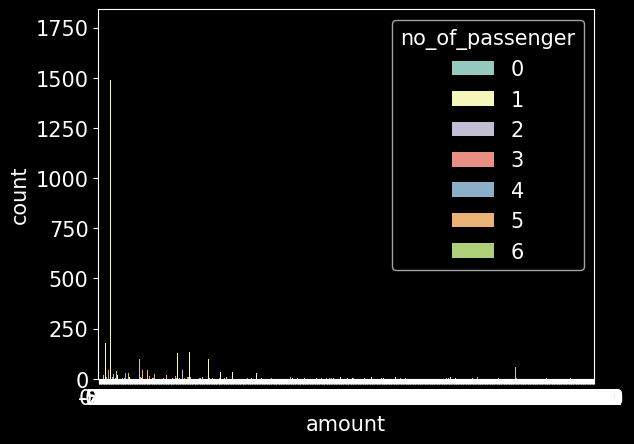

In [17]:
sns.countplot(data=df,x="amount",hue="no_of_passenger")

<Axes: xlabel='amount', ylabel='latitude_difference'>

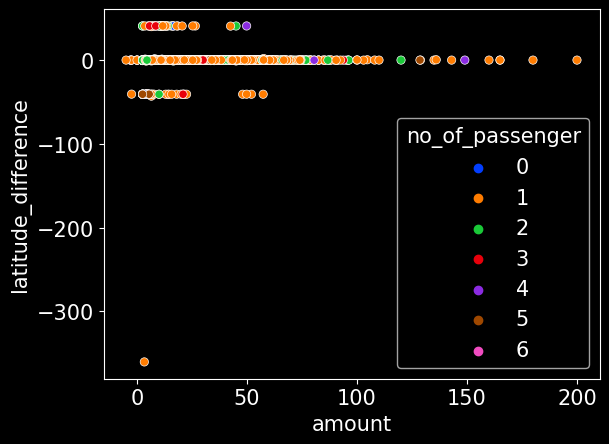

In [18]:
sns.scatterplot(data=df,x="amount",y="latitude_difference",hue="no_of_passenger",palette="bright")

<Axes: xlabel='amount', ylabel='longitude_difference'>

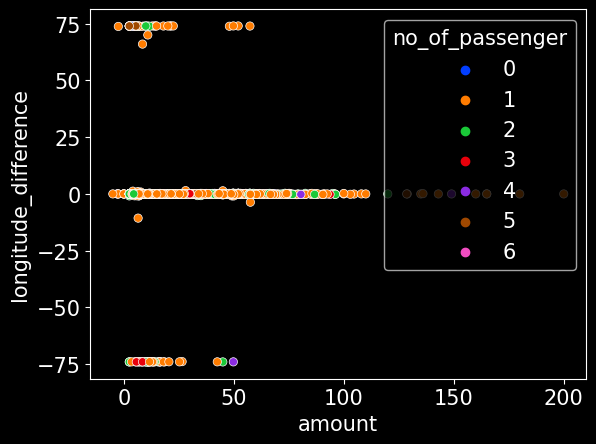

In [19]:
sns.scatterplot(data=df,x="amount",y="longitude_difference",hue="no_of_passenger",palette="bright")

## Spliting the data into train and test

In [20]:
X=df.drop(columns="amount",axis=1)
y=df["amount"]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

## Regression models

### 1.Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model1=LinearRegression()
model1.fit(X_train,y_train)
model1

LinearRegression()

In [24]:
model1.score(X_train,y_train)

0.017955981206069338

In [25]:
model1.score(X_test,y_test)

0.014755006335900656

#### Linear Regression is performing poorly with both train and test data.

### 2.Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
model2=DecisionTreeRegressor(max_depth=70,max_features=6)
model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=70, max_features=6)

In [28]:
model2.score(X_train,y_train)

1.0

In [29]:
model2.score(X_test,y_test)

0.5790572628432252

#### Decision tree is performing good with train data but not with test data.

### 3.KNN Algorithm

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
model3=KNeighborsRegressor(n_neighbors=100,weights='distance')
model3.fit(X_train,y_train)
y_predict3=model3.predict(X_test)
model3

KNeighborsRegressor(n_neighbors=100, weights='distance')

In [32]:
model3.score(X_train,y_train)

1.0

In [33]:
model3.score(X_test,y_test)

0.00916407642184558

#### KNN algorithm is performing good with train data but not with test data.

### 4.Ada Boost Algoritm

In [34]:
from sklearn.ensemble import AdaBoostRegressor

In [35]:
model4=AdaBoostRegressor(n_estimators=25)
model4.fit(X_train,y_train)
Ty_predict=model4.predict(X_test)

In [36]:
model4.score(X_train,y_train)

0.3868781455821676

In [37]:
model4.score(X_test,y_test)

0.33396471573324693

#### Ada boost algorithm is performing poorly with both train and test data.

### 5.Gradient Boosting Algorithm

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
model5=GradientBoostingRegressor(n_estimators=40)
model5.fit(X_train,y_train)
y_predict5=model5.predict(X_test)
model5

GradientBoostingRegressor(n_estimators=40)

In [40]:
model5.score(X_train,y_train)

0.7680935383686034

In [41]:
model5.score(X_test,y_test)

0.7327234920119141

#### Gradient boosting algorithm is performing good with the given dataset

### 6.Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model6=RandomForestRegressor(n_estimators=40,max_depth=7,max_features=8)
model6.fit(X_train,y_train)
model6

RandomForestRegressor(max_depth=7, max_features=8, n_estimators=40)

In [44]:
model6.score(X_train,y_train)

0.7864332019702

In [45]:
model6.score(X_test,y_test)

0.7339831704605217

#### Random forest algorithm is performig good with train data but not with test data.

### All the models are performing poorly but Gradient boosting and Random Forest regressors are performing good in predicting the fare based on latitude and longitude